### 3주차

In [4]:
import cv2

img = cv2.imread('C:/data/1213.png')
img.shape

img.ndim
# len(img.shape)

type(img)

numpy.ndarray

In [6]:
img.dtype # 픽셀의 데이터 타입, 8비트 즉 0 ~ 255 의 색 표현

dtype('uint8')

### 색상 참조

In [7]:
img[0, 0] # 왼쪽 최 상단의 밝기(색상) 값

array([128, 138, 225], dtype=uint8)

### 각각의 색을 참조할 경우

In [10]:
print(img[0, 0, 0]) # B
print(img[0, 0, 1]) # G
print(img[0, 0, 2]) # R

128
138
225


### for 루프를 사용해서 색상 변경

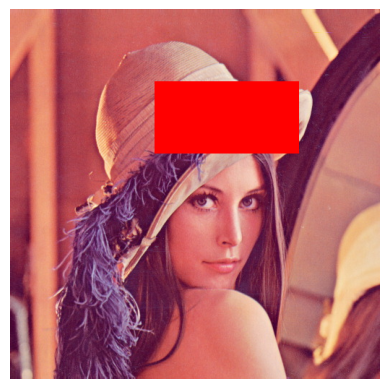

In [2]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('C:/data/1213.png')

for y in range(100, 200):
    for x in range(200, 400):
        img[y, x] = (0, 0, 255)

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### for 루프를 안 쓴 버전

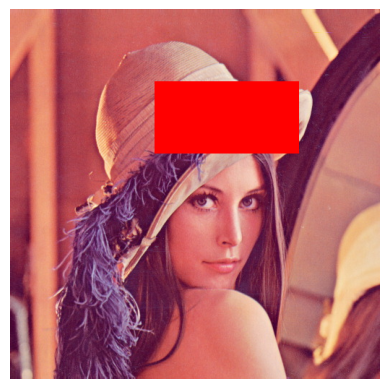

In [8]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('C:/data/lena.png')

pxColor = (0, 0, 255)
img[100:200, 200:400] = pxColor

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### 픽셀의 색상별로 밝기를 지정할 경우

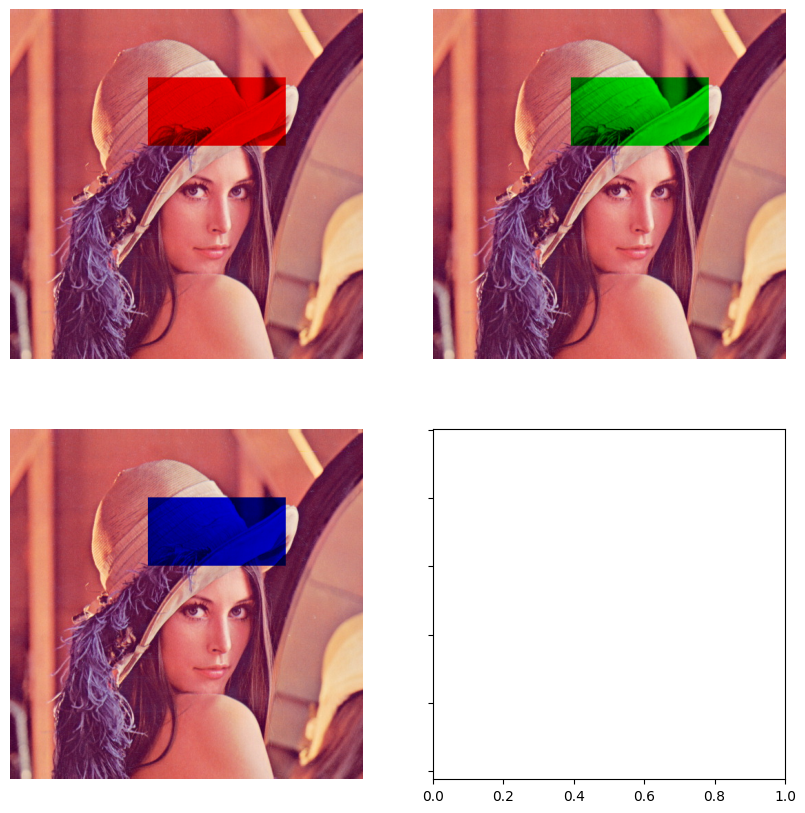

In [15]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('C:/data/lena.png')

imgR = img.copy()
imgG = img.copy()
imgB = img.copy()

pxColor = 0
imgR[100:200, 200:400, 0:2] = pxColor # b, g의 색상을 0으로 만들어서 r 만 출력 
imgG[100:200, 200:400, 0:3:2] = pxColor # 픽셀에 g의 정보만 저장
imgB[100:200, 200:400, 1:3] = pxColor # 픽셀에 b의 정보만 저장

imgR = cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB)
imgG = cv2.cvtColor(imgG, cv2.COLOR_BGR2RGB)
imgB = cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharey=True) # 2 x 2 서브플롯을 (10, 10)의 크기로 생성
fig.canvas.manager.set_window_title('plt') # 창 이름

ax[0][0].axis('off')
ax[0][0].imshow(imgR, aspect = 'auto') # aspect = 'auto' 비율을 자동으로 맞춰 줌

ax[0][1].axis('off')
ax[0][1].imshow(imgG, aspect = 'auto') # aspect = 'auto' 비율을 자동으로 맞춰 줌

ax[1][0].axis('off')
ax[1][0].imshow(imgB, aspect = 'auto') # aspect = 'auto' 비율을 자동으로 맞춰 줌

plt.show()

### 2번 픽셀을 파란색으로 표현

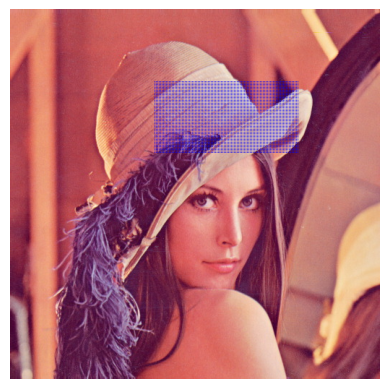

In [10]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('C:/data/lena.png')
pxColor = (255, 0, 0)
img[100:200:2, 200:400:2] = pxColor # 2픽셀 간격으로 파란색으로 표시

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### gray scale

* 흑백 색상 반전

(512, 512)


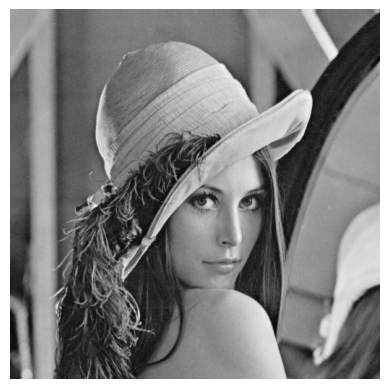

In [25]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('C:/data/1213.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)

neg_img = 255 - img # 색상 반전, for 안써서 해도 됨

# img = cv2.cvtColor(img, cv2.GRAY)

plt.axis('off')
plt.imshow(img, cmap='gray') # cmap='gray' 를 꼭 써줘야 제대로 나옴
# plt.imshow(neg_img, cmap='gray')
plt.show()

plt.show()

### 칼라 색상 반전

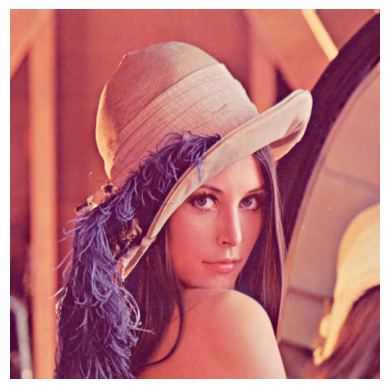

In [24]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('C:/data/1213.png')

neg_img = 255 - img # 색상 반전, for 안써서 해도 됨

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
neg_img = cv2.cvtColor(neg_img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)
# plt.imshow(neg_img)
plt.show()

### Video

In [17]:
import cv2

# cap = cv2.VideoCapture('C:/data/vtest.avi')

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    cv2.imshow('test', frame)
    key = cv2.waitKey(25)

    if key == 27:
        break

if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()

### youtube
* 실시간 영상은 안 됨

* 영상 저장에서 fourcc -> 4 글자라는 뜻

* pip install pafy

* pip install yt-dlp

#### C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pafy 에서 수정
* ##### pafy.py
* #import youtube_dl / import yt_dlp as youtube_dl #수정본

* ##### backend_youtube_dl.py
* #import youtube_dl
* import yt_dlp as youtube_dl
* #self._length = self._ydl_info['duration']
* #self._likes = self._ydl_info['like_count']
* #self._dislikes = self._ydl_info['dislike_count']

* 얘 녹화 해보기

In [4]:
import cv2
import pafy

url = "https://youtu.be/aqInfaYvEe0"
video = pafy.new(url) # url 해석

best = video.getbest()
print('best= ', best)

cap = cv2.VideoCapture(best.url)

while True:
    ret, frame = cap.read()

    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # grayscale로 만들기
    gray_reverse = 255 - gray # 흑백 색상 반전
    color_reverse = 255 - frame # 칼라 색상 반전
    
    frame = cv2.resize(frame, (480, 270))
    gray_reverse = cv2.resize(gray_reverse, (480, 270))

    cv2.imshow('color', frame)
    # cv2.imshow('gray', gray)
    cv2.imshow('gray_reverse', gray_reverse)
    # cv2.imshow('color_reverse', color_reverse)

    key = cv2.waitKey(25)

    if key == 27:
        break

if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()

best=  normal:mp4@1280x720


### 4.9 영상 복사

* 이퀄말고 copy()를 사용

In [36]:
import cv2
img = cv2.imread('C:/data/lena.jpg')
src = cv2.imread('C:/data/lena.jpg')
del img

# dst = src
dst = src.copy()
src[100:200, 200:400] = (255, 0, 0)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 4.11 채널 분리

In [47]:
import cv2
src = cv2.imread('C:/data/lena.jpg')

# dst = cv2.split(src)
# type(dst)
# len(dst)
# dst[0].shape # B 값
# dst[1].shape # G 값
# dst[2].shape # R 값

b, g, r = cv2.split(src)

cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.waitKey()
cv2.destroyAllWindows()

[[128 127 126 ... 126 110  86]
 [127 127 127 ... 130 112  83]
 [127 127 128 ... 127 112  85]
 ...
 [ 55  54  62 ...  82  78  74]
 [ 55  56  66 ...  82  80  81]
 [ 56  58  68 ...  81  81  84]]


### 4.12 채널 병합

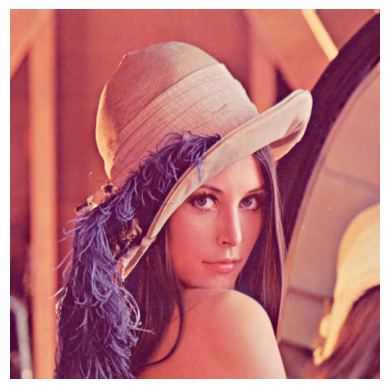

In [26]:
import cv2
from matplotlib import pyplot as plt

src = cv2.imread('C:/data/lena.jpg')

# rgb = cv2.merge([r, g, b]) # bgr을 rgb로 바꾸는 방법 1
plt.axis('off')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)) # bgr을 rgb로 바꾸는 방법 2
plt.show()

b, g, r = cv2.split(src)

cv2.waitKey()
cv2.destroyAllWindows()

### 영상 크기변환

In [2]:
import cv2
import numpy as np
src = cv2.imread('C:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.resize(src, (320, 200)) # 크기 지정 / 가로, 세로
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()